In [5]:
from manager import Manager
from point import Coord

manager = Manager(mean_jump = Coord(0,0, std = [0, 0]),
                  jump_occurance_probability = 500,
                  easting_jump_const = 0,
                  northing_jump_const = .2)



C:\Users\Jan Erik Naess\Winter2022\Software_Build\ENGO-500\shapeInitializer.py:64: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  self.zero_pass = gpd.overlay(self.inner_gdf, self.temp, how='intersection') #only take real that is inside inner


Epochs Processed: 48: 100%|███████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 512.01it/s]


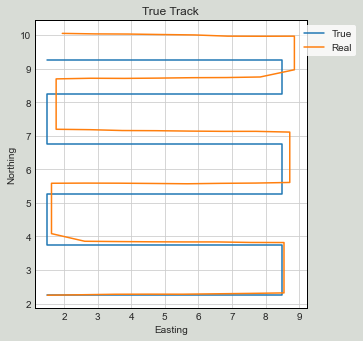

In [6]:
manager.plot_a()
#manager.plot_b()
#manager.plot_c()
#manager.plot_d()
#manager.plot_e()
#manager.plot_f()
#manager.df_sim

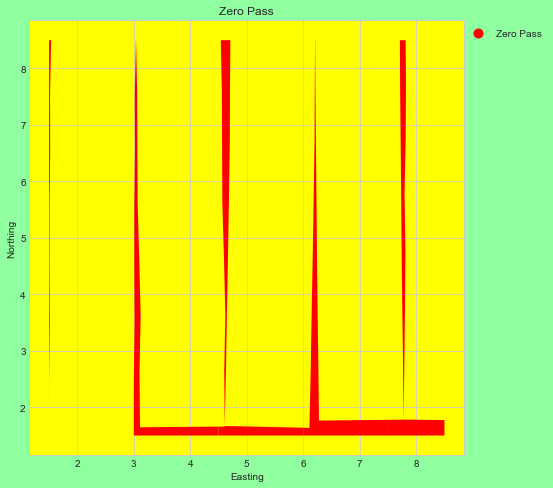

In [3]:
manager.plot_b()

In [6]:
manager.Sim.single_pass.columns

Index(['color', 'geometry', 'title'], dtype='object')

<AxesSubplot:>

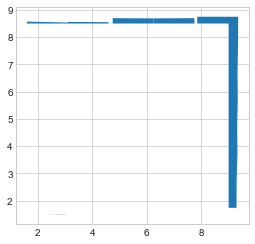

In [4]:
manager.Sim.double_pass.plot()

<AxesSubplot:>

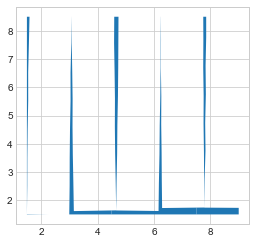

In [6]:
manager.Sim.temp.plot()

<AxesSubplot:>

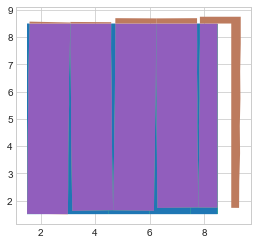

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#manager.Sim.inner.plot(ax=ax)
manager.Sim.inner_gdf.plot(ax=ax, color='#49e37c')
#manager.Sim.temp.plot(ax=ax, color='red')
manager.Sim.zero_pass.plot(ax=ax)
manager.Sim.single_pass.plot(ax=ax, color = '#915ebd')
manager.Sim.double_pass.plot(ax=ax, color = '#bd7b5e')

<AxesSubplot:>

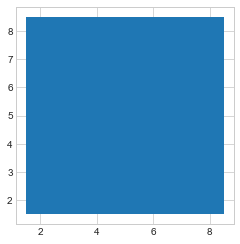

In [8]:
manager.Sim.inner_gdf.plot()

NameError: name 'manager' is not defined

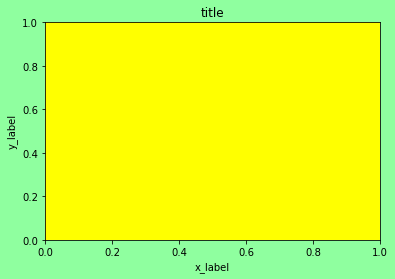

In [1]:
import matplotlib.pyplot as plt

x_label="x_label"
y_label="y_label"
title="title"

fig, ax = plt.subplots()

fig.patch.set_facecolor('xkcd:mint green')


ax.set_ylabel(y_label)
ax.set_xlabel(x_label)
ax.set_title(title)

ax.set_facecolor("yellow")

manager.Sim.T_gdf_pt.plot(ax=ax)
manager.Sim.R_gdf_pt.plot(ax=ax)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('purple')
frame.set_edgecolor('white')
frame.set_linewidth(0)
        
plt.show()
        

        ##ax.set_aspect('equal')

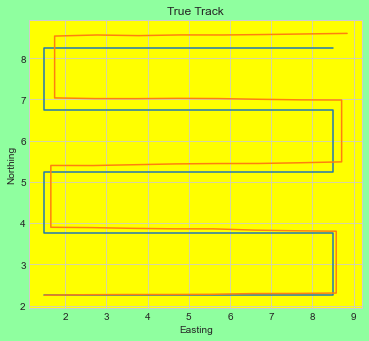

In [123]:
from manager import Manager

manager = Manager()
sim = manager.Sim
df = sim.output_tracks

20

In [13]:
from positionGenerator import PositionGenerator as PG
from point import Coord
pg = PG(Coord(.2,.2,std = [0, 0]))

In [14]:
pg.generate_one()
pg.unique_pnt

[0.2, 0.2]

In [23]:
from random import randint

for i in range(100):
    print(randint(1,5))


3
5
1
4
2
2
1
4
4
2
3
4
3
1
2
1
5
4
2
3
5
1
1
3
3
3
3
4
1
2
1
3
3
4
3
1
3
4
4
4
3
5
3
2
2
3
5
4
2
3
2
2
5
1
4
5
5
5
4
5
5
3
1
3
2
5
3
1
2
1
5
5
1
1
3
4
4
2
5
4
1
3
4
3
2
3
3
4
1
3
1
2
1
1
2
5
5
2
2
2
